<h1>Welcome to SidLabs for DataScience with Capstone</h1>

In [1]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### There is some test code below, please ignore ...

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.numbeo.com/crime/compare_cities.jsp?country1=Canada&city1=Toronto&country2=United+States&city2=New+York%2C+NY"

page=requests.get(url)
soup = BeautifulSoup(page.text,'html.parser')
review_txt = soup.find_all(class_='table_indices')
review_txt

[<table class="table_indices">
 <tr><th>Index   <a href="https://www.numbeo.com/crime/indices_explained.jsp" title="About these indices"><img alt="Info" class="image_help" src="https://www.numbeo.com/images/information.png"/></a></th><th>Toronto</th><th>New York, NY</th></tr>
 <tr><td>Crime Index: </td>
 <td style="text-align: right">
    38.46</td>
 <td style="text-align: right">
    44.50</td>
 </tr>
 <tr><td>Safety Scale: </td>
 <td style="text-align: right">
    61.54</td>
 <td style="text-align: right">
    55.50</td>
 </tr>
 </table>]

In [2]:
review_txt[0].find('td')

<td>Crime Index: </td>

In [3]:
import pandas as pd
from tabulate import tabulate
df = pd.read_html(str(review_txt))
print(tabulate(df[0], headers='keys', tablefmt='psql'))

+----+---------------+-----------+----------------+
|    | Index         |   Toronto |   New York, NY |
|----+---------------+-----------+----------------|
|  0 | Crime Index:  |     38.46 |           44.5 |
|  1 | Safety Scale: |     61.54 |           55.5 |
+----+---------------+-----------+----------------+


In [34]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 


# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [16]:
!wget -q -O 'nyu_2451_34572-geojson.json' https://cocl.us/new_york_dataset
print('New York Data downloaded!')
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
    newyork_data

New York Data downloaded!


In [17]:
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [19]:
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [21]:
neighborhoods.head(15)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [22]:
neighborhoods.shape

(306, 4)

In [23]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [24]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [26]:
neighborhood_ll = neighborhoods.drop(["Borough","Neighborhood"],axis=1)
neighborhood_ll.head()

,Latitude,Longitude
0,40.894705,-73.847201
1,40.874294,-73.829939
2,40.887556,-73.827806
3,40.895437,-73.905643
4,40.890834,-73.912585


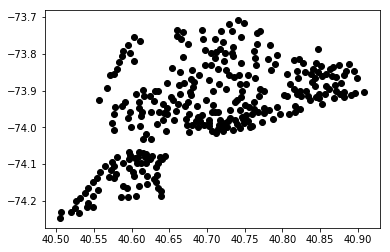

In [46]:
x1 = neighborhood_ll["Latitude"].tolist()#assigning column data to arrays x1 & x2
x2 = neighborhood_ll["Longitude"].tolist()
#print('Datapoints defined!')
plt.plot(x1, x2, 'o', color='black');

In [90]:
Y= np.concatenate((x1,x2), axis=0)
y = Y.reshape(-1, 1)
k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 18)
k_means.fit(y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=18, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [91]:
k_means_labels = k_means.labels_
k_means_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 5, 5,
       1, 5, 5, 1, 1, 1, 1, 5, 5, 5, 1, 1, 5, 2, 2, 2, 2, 2, 2, 5, 5, 5,
       5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 2, 2,
       1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1,
       1, 1, 1, 1, 5, 1, 1, 1, 2, 5, 1, 2, 2, 2, 1,

In [92]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-73.95315493],
       [ 40.60378672],
       [ 40.83364218],
       [-74.13414901],
       [-73.82467123],
       [ 40.71957226]])

In [108]:
print("Hence the three centroids identified by us are : \n")
B = np.reshape(k_means_cluster_centers, (-1, 2))
B

Hence the three centroids identified by us are : 



array([[-73.95315493,  40.60378672],
       [ 40.83364218, -74.13414901],
       [-73.82467123,  40.71957226]])

In [111]:
df4= pd.DataFrame(B)
df4

,0,1
0,-73.953155,40.603787
1,40.833642,-74.134149
2,-73.824671,40.719572


In [120]:
#restructuring df
df4.at[0, 0] = 40.603787
df4.at[0, 1] = -73.953155
df4.at[2, 0] = 40.719572
df4.at[2, 1] = -73.824671
neighborhood_lln = df4.drop([2],axis=1)
neighborhood_lln.columns = ["Latitude", "Longitude"]
neighborhood_lln

,Latitude,Longitude
0,40.603787,-73.953155
1,40.833642,-74.134149
2,40.719572,-73.824671


In [121]:
# creating a new map of new york with the proposed coordinates
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng in zip(neighborhood_lln['Latitude'], neighborhood_lln['Longitude']):
    label = '{}, {}'.format(neighborhood_lln, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork